<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Classification_Lyrics_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/TFID

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/TFID


In [11]:
import numpy as np
import logging
import pandas as pd
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

In [12]:
df = pd.read_csv('Lyrical_data_5.csv',encoding='cp1252')
df = df.dropna(how="any").reset_index(drop=True)
df.head()

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Love
4,5,Better than words,Better than words\rMore than a feeling Crazy i...,Love


In [13]:
df['word_count'] = df['Chorus'].apply(lambda x: len(str(x).split(" ")))
df[['Chorus','word_count']].head()

,Chorus,word_count
0,"Diana,\rLet me be the one to light a fire insi...",46
1,Don't forget where you belong\rHome\rDon't for...,24
2,"I'm sorry if I say, ""I need you""\nBut I don't ...",34
3,I don't care what people say when we're togeth...,40
4,Better than words\rMore than a feeling Crazy i...,29


In [14]:
##Descriptive statistics of word counts
df.word_count.describe()

count    800.000000
mean      52.601250
std       37.947691
min        1.000000
25%       31.000000
50%       46.000000
75%       66.000000
max      716.000000
Name: word_count, dtype: float64

In [15]:
#Identify common words
freq = pd.Series(' '.join(df['Chorus']).split()).value_counts()[:5]
freq

I      2208
you    1547
the    1515
to     1004
me      858
dtype: int64

In [16]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(df
         ['Chorus']).split()).value_counts()[-10:]
freq1

Magnifying      1
smiled          1
bags            1
yourselves      1
Blind           1
subliminally    1
reached         1
arm,            1
hustler         1
b-word          1
dtype: int64

In [25]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from string import punctuation
# from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
corpus = []

for i in range(0, len(df['Chorus'])):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df['Chorus'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    ##Convert to list from string
    text = text.split()
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('down')
    all_stopwords.remove("y")
    all_stopwords.remove("i")
    all_stopwords.remove('over')
    all_stopwords.remove('under')
    all_stopwords.remove('no')
    all_stopwords.remove('only')
    all_stopwords.remove("don't")
    all_stopwords.remove("aren't")
    all_stopwords.remove("o")
    all_stopwords.remove("ma")
    all_stopwords.remove("didn't")
    all_stopwords.remove("can")
    all_stopwords.remove("be")
    all_stopwords.remove("to")
    all_stopwords.remove("for")
    # all_stopwords.remove("you")
    all_stopwords.remove("your")
    all_stopwords.remove("we")
    all_stopwords.remove("our")
    all_stopwords.remove("my")
    all_stopwords.remove("you're")
    text = [lem.lemmatize(word) for word in text if not word in  
            set(all_stopwords)] 
    text = " ".join(text)
    corpus.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
corpus[0]

'diana let be one to light fire inside eye lonely even know i can feel cry diana let be one to lift your heart save your life i think even realize baby be saving mine'

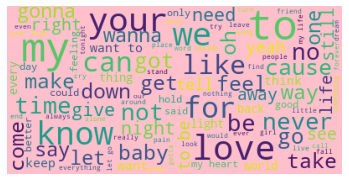

In [27]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(background_color='pink',stopwords=set(all_stopwords),max_words=100,max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=set(all_stopwords), max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [29]:
list(cv.vocabulary_.keys())[:10]

['diana', 'let', 'be', 'one', 'to', 'light', 'fire', 'inside', 'eye', 'lonely']

In [30]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [31]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'to'),
 Text(0, 0, 'my'),
 Text(0, 0, 'your'),
 Text(0, 0, 'love'),
 Text(0, 0, 'we'),
 Text(0, 0, 'be'),
 Text(0, 0, 'can'),
 Text(0, 0, 'for'),
 Text(0, 0, 'know'),
 Text(0, 0, 'like'),
 Text(0, 0, 'no'),
 Text(0, 0, 'go'),
 Text(0, 0, 'let'),
 Text(0, 0, 'down'),
 Text(0, 0, 'get'),
 Text(0, 0, 'not'),
 Text(0, 0, 'never'),
 Text(0, 0, 'oh'),
 Text(0, 0, 'time'),
 Text(0, 0, 'baby')]

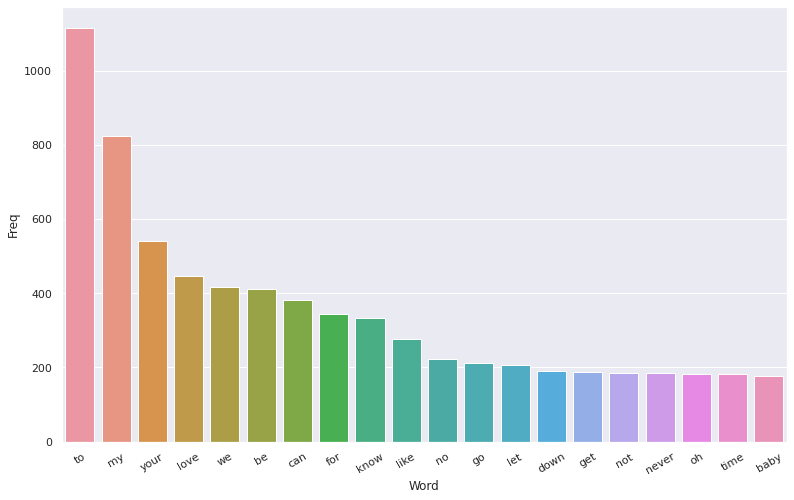

In [32]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names_out()
 
# fetch document for which keywords needs to be extracted
doc=corpus[2]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [35]:
tf_idf_vector.shape

(1, 10000)

In [36]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [37]:
sorted_items=sort_coo(tf_idf_vector.tocoo())
#sort the tf-idf vectors by descending order of scoressorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
i sorry i say i need i care i not scared love cause i not i weaker wrong wrong make strong

Keywords:
wrong 0.324
scared love cause 0.26
say need care 0.26
wrong wrong 0.245
wrong make 0.245
sorry say 0.245
scared love 0.245
say need 0.245
make strong 0.245
love cause 0.245
cause not 0.245
weaker 0.234
not 0.215
scared 0.19
sorry 0.173
care 0.165
strong 0.162
need 0.117
make 0.117
say 0.111
cause 0.11
love 0.086


In [38]:
df.iloc[2,2]

'I\'m sorry if I say, "I need you"\nBut I don\'t care, I\'m not scared of love\n\'Cause when I\'m not with you, I\'m weaker\nIs that so wrong? Is it so wrong\nThat you make me strong?'

In [52]:
cv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
X = cv.fit_transform(corpus).toarray()
y = df.iloc[0:800, -1].values

In [50]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, string

In [43]:
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(X)
topic_word = lda_model.components_ 
vocab = cv.get_feature_names_out()
topic_word.shape

(20, 3205)

In [44]:
n_top_words = 20
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [45]:
topic_words

array(['eat', 'certain', 'porch', 'pumpkin', 'treated', 'brow', 'sweat',
       'surrender', 'stood', 'york', 'grabbin', 'famous', 'puppet',
       'sunset', 'spanish', 'satin', 'alice', 'dy', 'sleeping',
       'levitate'], dtype=object)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [58]:
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

my_emotions = ['Happy','Sad','Calm','Inspiration','Angry','Love']

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.01875


ValueError: ignored